In [1]:
#Predicting House Price


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
import os
os.chdir('E:\\Datasets\\UpGrad')

In [4]:
df=pd.read_csv('Housing.csv')

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [7]:
df.shape

(545, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


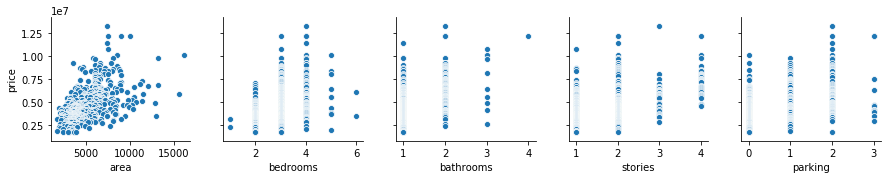

In [11]:
sns.pairplot(x_vars=['area','bedrooms','bathrooms','stories','parking'],y_vars=['price'],data=df)

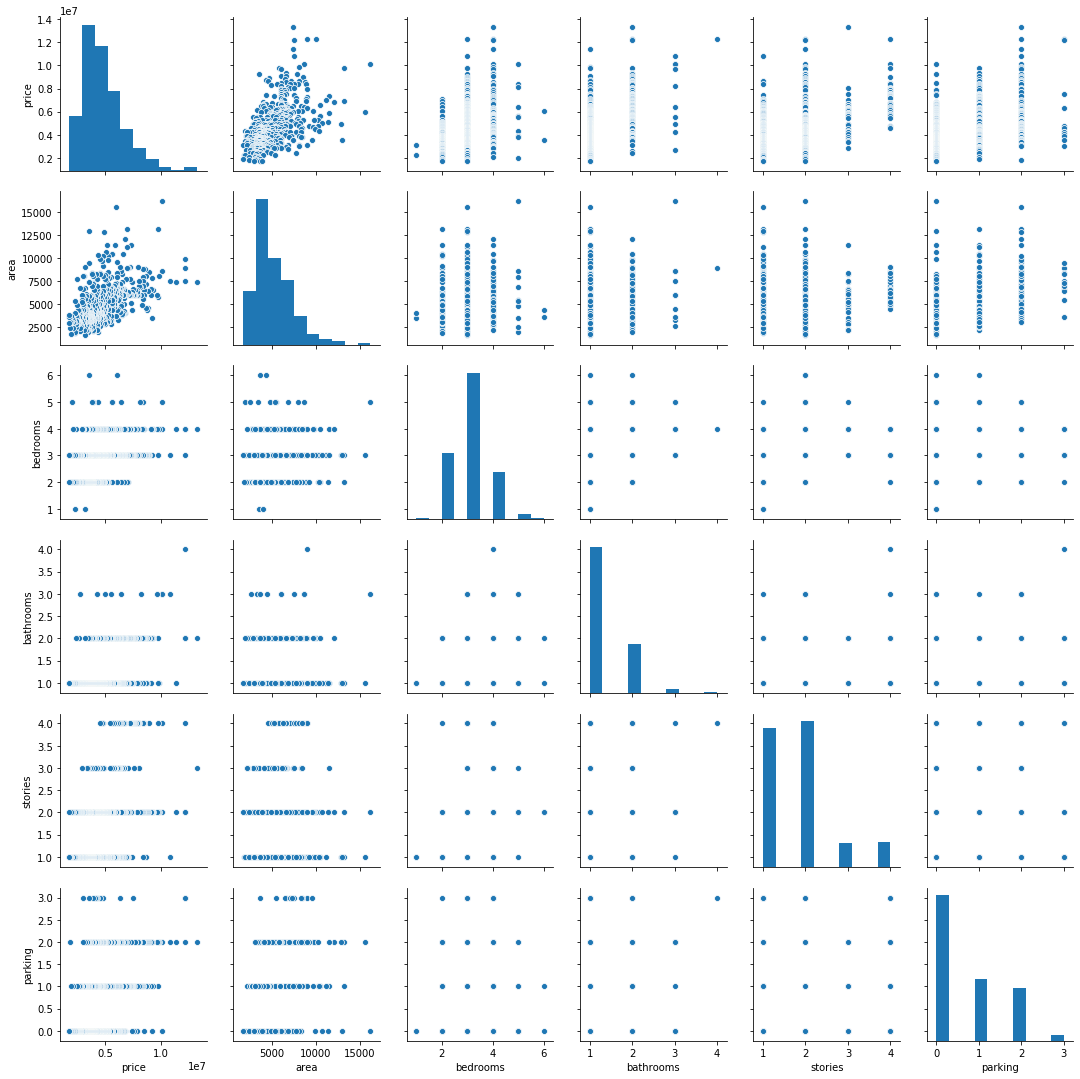

In [12]:
sns.pairplot(df)
plt.show()

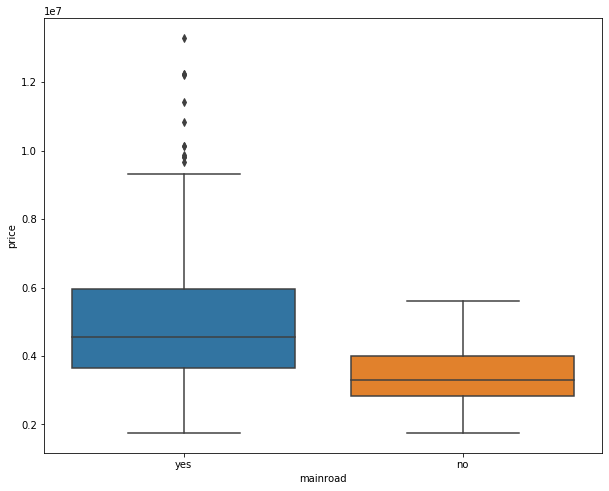

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mainroad',y='price',data=df)

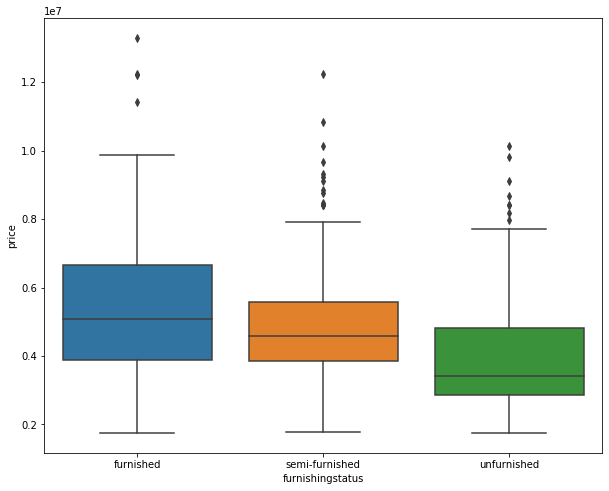

In [14]:

plt.figure(figsize=(10,8))
sns.boxplot(x='furnishingstatus',y='price',data=df)

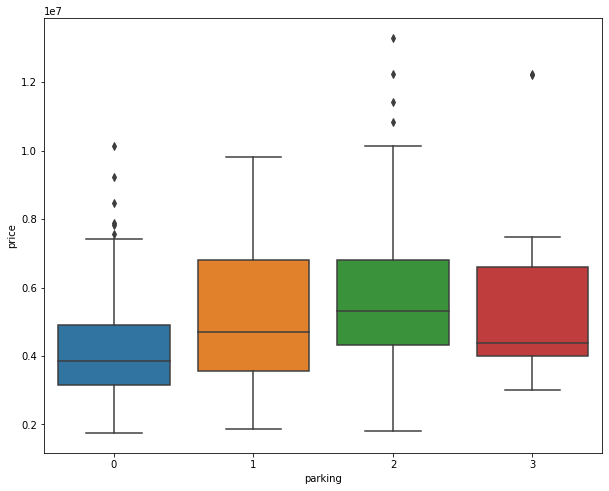

In [15]:

plt.figure(figsize=(10,8))
sns.boxplot(x='parking',y='price',data=df)

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

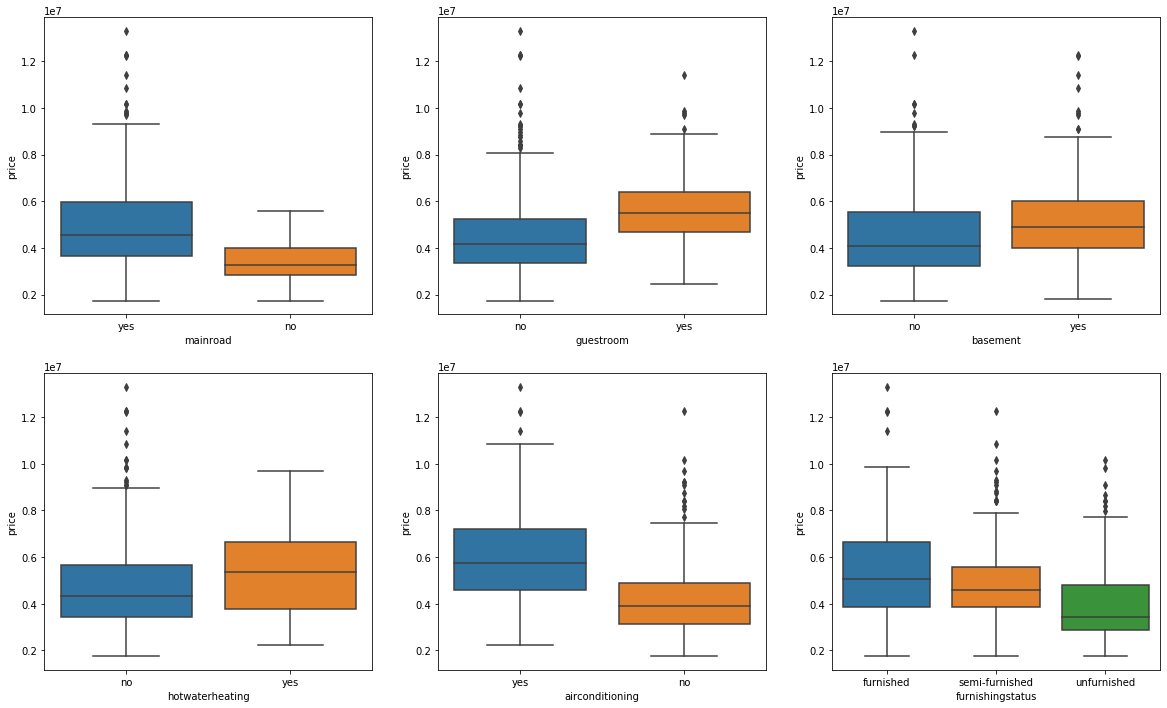

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

In [17]:
status=pd.get_dummies(df['furnishingstatus'],drop_first=True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [18]:
df=pd.concat([df,status],axis=1)

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
semi-furnished      545 non-null uint8
unfurnished         545 non-null uint8
dtypes: int64(6), object(7), uint8(2)
memory usage: 56.5+ KB


In [21]:
df=df.drop(['furnishingstatus'],axis=1)

In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0,0


In [23]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [24]:
var=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[var].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [25]:
df[var]=df[var].apply(lambda x: x.map({'yes':1,'no':0}))

In [26]:
df[var].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [27]:
import sklearn
from sklearn.model_selection import train_test_split

In [28]:
df_train,df_test = train_test_split(df, train_size=0.7,random_state=100)
print(df_train.shape)

(381, 14)


In [29]:
print(df_test.shape)

(164, 14)


In [30]:
from sklearn.preprocessing import MinMaxScaler
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [31]:
num_vars=['area','bedrooms','bathrooms','stories','parking','price']

In [32]:
scaler=MinMaxScaler()

In [33]:
df[num_vars]=scaler.fit_transform(df[num_vars])

In [34]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


In [35]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.261189,0.240587,0.393028,0.095413,0.268502,0.858716,0.177982,0.350459,0.045872,0.315596,0.231193,0.234862,0.416514,0.326606
std,0.161943,0.149151,0.147613,0.167490,0.289164,0.348635,0.382849,0.477552,0.209399,0.465180,0.287195,0.424302,0.493434,0.469402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145455,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.224242,0.202749,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.323711,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df[num_vars].describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.240587,0.393028,0.095413,0.268502,0.231193,0.261189
std,0.149151,0.147613,0.167490,0.289164,0.287195,0.161943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134021,0.200000,0.000000,0.000000,0.000000,0.145455
50%,0.202749,0.400000,0.000000,0.333333,0.000000,0.224242
75%,0.323711,0.400000,0.333333,0.333333,0.333333,0.345455
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df[num_vars].head()

,area,bedrooms,bathrooms,stories,parking,price
0,0.396564,0.6,0.333333,0.666667,0.666667,1.000000
1,0.502405,0.6,1.000000,1.000000,1.000000,0.909091
2,0.571134,0.4,0.333333,0.333333,0.666667,0.909091
3,0.402062,0.6,0.333333,0.333333,1.000000,0.906061
4,0.396564,0.6,0.000000,0.333333,0.666667,0.836364


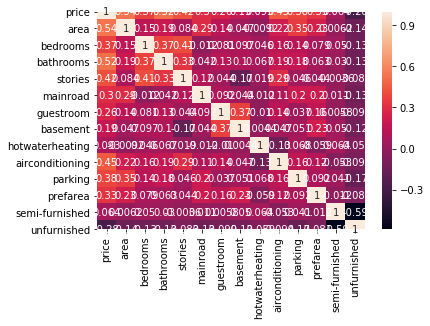

In [38]:
sns.heatmap(df.corr(),annot=True)

In [39]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [40]:
xi_train=df_train
yi_train=df_train.pop('price')

In [41]:
xi_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [42]:
yi_train.head()

359    3710000
19     8855000
159    5460000
35     8080940
28     8400000
Name: price, dtype: int64

In [43]:
import statsmodels.api as sm

In [44]:
xi_train_sm=sm.add_constant(xi_train['area'])
lr=sm.OLS(yi_train,xi_train_sm)


In [45]:
lr_model=lr.fit()

In [46]:
lr_model.params

const    2.353148e+06
area     4.697569e+02
dtype: float64

In [47]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           3.15e-29
Time:                        13:10:46   Log-Likelihood:                -5968.7
No. Observations:                 381   AIC:                         1.194e+04
Df Residuals:                     379   BIC:                         1.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.353e+06   2.12e+05     11.109      0.000    1.94e+06    2.77e+06
area         469.7569     38.403     12.232      0.000     394.247     545.267
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
xi_train_sm=sm.add_constant(xi_train[['area','bathrooms']])
lr=sm.OLS(yi_train,xi_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           2.51e-54
Time:                        13:10:46   Log-Likelihood:                -5907.7
No. Observations:                 381   AIC:                         1.182e+04
Df Residuals:                     378   BIC:                         1.183e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.915e+05   2.39e+05      2.059      0.040    2.22e+04    9.61e+05
area         404.9168     33.211     12.192      0.000     339.616     470.218
bathrooms   1.723e+06   1.44e+05     11.945      0.000    1.44e+06    2.01e+06
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                     2.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
xi_train_sm=sm.add_constant(xi_train[['area','bathrooms','bedrooms']])
lr=sm.OLS(yi_train,xi_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           3.12e-57
Time:                        13:10:46   Log-Likelihood:                -5898.1
No. Observations:                 381   AIC:                         1.180e+04
Df Residuals:                     377   BIC:                         1.182e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.257e+05   3.13e+05     -1.361      0.174   -1.04e+06    1.89e+05
area         398.6304     32.465     12.279      0.000     334.794     462.466
bathrooms   1.501e+06    1.5e+05     10.033      0.000    1.21e+06     1.8e+06
bedrooms    4.201e+05   9.56e+04      4.396      0.000    2.32e+05    6.08e+05
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                     2.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
xi_train_sm=sm.add_constant(xi_train)
lr=sm.OLS(yi_train,xi_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           8.83e-83
Time:                        13:10:46   Log-Likelihood:                -5814.1
No. Observations:                 381   AIC:                         1.166e+04
Df Residuals:                     367   BIC:                         1.171e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.426e+04   3.14e+05     -0.269      0.788   -7.01e+05    5.32e+05
area              238.5044     30.596      7.795      0.000     178.339     298.670
bedrooms          1.08e+05   8.52e+04      1.267      0.206   -5.96e+04    2.76e+05
bathrooms        1.102e+06   1.27e+05      8.679      0.000    8.52e+05    1.35e+06
stories          4.178e+05   7.38e+04      5.661      0.000    2.73e+05    5.63e+05
mainroad         5.826e+05   1.65e+05      3.520      0.000    2.57e+05    9.08e+05
guestroom        3.514e+05   1.57e+05      2.233      0.026     4.2e+04    6.61e+05
basement         2.494e+05   1.28e+05      1.943      0.053   -3043.974    5.02e+05
hotwaterheating  9.802e+05   2.49e+05      3.934      0.000     4.9e+05    1.47e+06
airconditioning  7.725e+05   1.31e+05      5.899      0.000    5.15e+05    1.03e+06
parking          2.338e+05   6.95e+04      3.365      0.001    9.72e+04     3.7e+05
prefarea         6.864e+05   1.36e+05      5.040      0.000    4.19e+05    9.54e+05
semi-furnished   1.063e+04   1.36e+05      0.078      0.938   -2.58e+05    2.79e+05
unfurnished     -3.581e+05   1.47e+05     -2.440      0.015   -6.47e+05   -6.95e+04
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                     3.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

#### VIF

In [52]:
vif=pd.DataFrame()
vif['Features']=xi_train.columns
vif['VIF']=[variance_inflation_factor(xi_train.values,i) for i in range(xi_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,16.45
2,bathrooms,9.85
0,area,8.90
3,stories,7.67
4,mainroad,7.07
11,semi-furnished,2.36
9,parking,2.10
6,basement,2.02
12,unfurnished,1.98
8,airconditioning,1.79


In [53]:
X=xi_train.drop('semi-furnished',axis=1)

In [54]:
xi_train_sm=sm.add_constant(X)
lr=sm.OLS(yi_train,xi_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           1.07e-83
Time:                        13:10:47   Log-Likelihood:                -5814.1
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     368   BIC:                         1.171e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -7.57e+04   2.93e+05     -0.258      0.797   -6.53e+05    5.01e+05
area              238.2405     30.367      7.845      0.000     178.526     297.955
bedrooms         1.079e+05   8.51e+04      1.268      0.206   -5.95e+04    2.75e+05
bathrooms        1.102e+06   1.27e+05      8.697      0.000    8.53e+05    1.35e+06
stories          4.176e+05   7.37e+04      5.669      0.000    2.73e+05    5.63e+05
mainroad         5.821e+05   1.65e+05      3.524      0.000    2.57e+05    9.07e+05
guestroom        3.517e+05   1.57e+05      2.238      0.026    4.27e+04    6.61e+05
basement         2.495e+05   1.28e+05      1.946      0.052   -2568.953    5.02e+05
hotwaterheating  9.805e+05   2.49e+05      3.941      0.000    4.91e+05    1.47e+06
airconditioning  7.716e+05    1.3e+05      5.923      0.000    5.15e+05    1.03e+06
parking          2.339e+05   6.94e+04      3.372      0.001    9.75e+04     3.7e+05
prefarea         6.863e+05   1.36e+05      5.046      0.000    4.19e+05    9.54e+05
unfurnished     -3.649e+05   1.18e+05     -3.096      0.002   -5.97e+05   -1.33e+05
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                     3.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(xi_train.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,16.45
2,bathrooms,9.85
0,area,8.90
3,stories,7.67
4,mainroad,7.07
11,unfurnished,2.36
9,parking,2.10
6,basement,2.02
8,airconditioning,1.79
10,prefarea,1.50


In [56]:
X=X.drop('bedrooms',axis=1)

In [57]:
xi_train_sm=sm.add_constant(X)
lr=sm.OLS(yi_train,xi_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           2.73e-84
Time:                        13:10:47   Log-Likelihood:                -5814.9
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     369   BIC:                         1.170e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.365e+05   2.41e+05      0.566      0.572   -3.38e+05    6.11e+05
area              238.5887     30.391      7.851      0.000     178.828     298.349
bathrooms        1.135e+06   1.24e+05      9.132      0.000     8.9e+05    1.38e+06
stories          4.533e+05   6.81e+04      6.654      0.000    3.19e+05    5.87e+05
mainroad         5.636e+05   1.65e+05      3.423      0.001     2.4e+05    8.87e+05
guestroom        3.476e+05   1.57e+05      2.211      0.028    3.85e+04    6.57e+05
basement         2.762e+05   1.27e+05      2.183      0.030    2.74e+04    5.25e+05
hotwaterheating   9.98e+05   2.49e+05      4.014      0.000    5.09e+05    1.49e+06
airconditioning  7.685e+05    1.3e+05      5.895      0.000    5.12e+05    1.02e+06
parking          2.421e+05   6.91e+04      3.501      0.001    1.06e+05    3.78e+05
prefarea         6.889e+05   1.36e+05      5.061      0.000    4.21e+05    9.57e+05
unfurnished     -3.733e+05   1.18e+05     -3.169      0.002   -6.05e+05   -1.42e+05
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                     2.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(xi_train.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bathrooms,16.45
2,stories,9.85
0,area,8.90
3,mainroad,7.67
4,guestroom,7.07
9,prefarea,2.10
6,hotwaterheating,2.02
8,parking,1.79
10,unfurnished,1.50
5,basement,1.46


## Residual Analysis



In [59]:
y_train_pred=lr_model.predict(xi_train_sm)

In [60]:
res=yi_train -y_train_pred

In [61]:
print(res)

359    6.941270e+05
19     1.747703e+06
159   -1.067025e+05
35     3.753996e+05
28     1.241999e+06
           ...     
526   -3.636105e+05
53     8.584865e+04
350   -1.017486e+06
79    -2.271206e+05
520   -1.302031e+06
Length: 381, dtype: float64


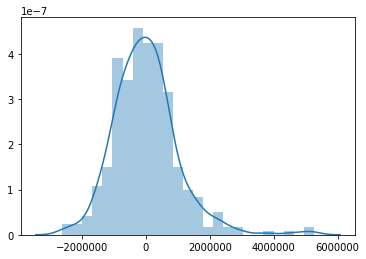

In [62]:
sns.distplot(res)

## Predictiong and evaluation on test set

In [63]:
num_vars=['area','bedrooms','bathrooms','stories','parking']
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

ValueError: operands could not be broadcast together with shapes (164,5) (6,) (164,5) 

In [64]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,1.640000e+02,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,4.789686e+06,5228.695122,3.042683,1.317073,1.804878,0.865854,0.195122,0.347561,0.030488,0.353659,0.615854,0.237805,0.420732,0.329268
std,1.987485e+06,2408.283816,0.737685,0.562162,0.828022,0.341853,0.397508,0.477654,0.172452,0.479569,0.867967,0.427043,0.495189,0.471387
min,1.820000e+06,1650.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.395000e+06,3518.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.361000e+06,4787.500000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.757500e+06,6352.500000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.225000e+07,16200.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [65]:
y_test= df_test.pop('price')

In [73]:
x_test=df_test

In [74]:
x_test_sm=sm.add_constant(x_test)
x_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,1.0,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,1.0,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,1.0,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,1.0,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [75]:
x_test_sm.columns

Index(['const', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [76]:
x_test_sm=x_test_sm.drop(['bedrooms','semi-furnished'],axis=1)

In [77]:
x_test_sm.head()

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,2880,1,2,1,0,0,0,0,0,1,0
54,1.0,6000,2,2,1,1,0,0,1,1,0,0
171,1.0,10269,1,1,1,0,0,0,0,1,1,0
244,1.0,5320,1,2,1,1,1,0,0,0,1,0
268,1.0,4950,1,2,1,0,0,0,1,0,0,0


In [78]:
#predict
y_test_pred=lr_model.predict(x_test_sm)

In [79]:
#Evalute to find r Square

In [80]:
from sklearn.metrics import r2_score 

In [81]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.6713505684480789


# EQUATION OF OUR BEST FITTED LINE:

###  Price=  0.236  x  area  + 0.202  x bathrooms + 0.11 x  Stories +0.05 x Mainroad +0.04
### x Guestroom + 0.0876 x  hotwaterheating + 0.0682 x  Airconditioning + 0.0629 x parking
### + 0.0637 x prefarea -0.0337 x unfinished